In [231]:
import pandas as pd
import matplotlib.pyplot as plt

import sqlalchemy

from mplsoccer import Pitch
from sqlalchemy import create_engine, text

In [232]:
def db_conn(_username, _password, _host, _port, _database) : 
    db_engine = sqlalchemy.engine.URL.create(
        drivername = "mysql+pymysql",
        username = _username,
        password = _password,
        host = _host,
        port = _port,
        database = _database,
    )

    return create_engine(db_engine)

In [233]:
engine = db_conn('root', 'Dhyoon96!', 'localhost', 3306, 'side_proj_fco')
df_query = 'SELECT * FROM shoot_user_detail'

# Use the connection to read the SQL query into a DataFrame
with engine.connect() as connection:
    shoot_detail_df = pd.read_sql(df_query, con = connection)
    
pitch_half = Pitch(pitch_type = 'metricasports', 
                   pitch_length = 105, pitch_width = 68,
                   positional = True,
                   corner_arcs = True,
                   axis = True, half = True)

pitch_full = Pitch(pitch_type = 'metricasports', 
                   pitch_length = 105, pitch_width = 68,
                   positional = True,
                   corner_arcs = True,
                   axis = True)

shots_goal = shoot_detail_df[(shoot_detail_df['shoot_result'] == 3)]
shots_nogoal = shoot_detail_df[(shoot_detail_df['shoot_result'] == 1) | (shoot_detail_df['shoot_result'] == 2)]

goal_assist = shoot_detail_df[(shoot_detail_df['shoot_assist'] == 1) & 
                               (shoot_detail_df['shoot_result'] == 3)]

goal_assist_outpenalty = shoot_detail_df[(shoot_detail_df['shoot_assist'] == 1) & 
                                         (shoot_detail_df['shoot_result'] == 3) & 
                                         (shoot_detail_df['shoot_inpenalty'] == 0)]

goal_assist_inpenalty = shoot_detail_df[(shoot_detail_df['shoot_assist'] == 1) & 
                                        (shoot_detail_df['shoot_result'] == 3) & 
                                        (shoot_detail_df['shoot_inpenalty'] == 1)]                   

# Time for shoot & goal

In [252]:
def list_to_10(temp) : 
    temp_count = list(temp.value_counts().values)

    while len(temp_count) < 10:
        temp_count.append(0)

    return temp_coun

In [242]:
shoot_detail_df['shoot_time'].describe()

count     190.000000
mean      995.557895
std       659.120879
min       102.000000
25%       442.500000
50%       854.500000
75%      1420.750000
max      2904.000000
Name: shoot_time, dtype: float64

In [243]:
shoot_time = ((shoot_detail_df['shoot_time'] // 60) // 10) * 10
goal_time = ((shoot_detail_df[shoot_detail_df['shoot_result'] == 3]['shoot_time'] // 60) // 10) * 10

shoot_count = list_to_10(shoot_time)
goal_count = list_to_10(goal_time)

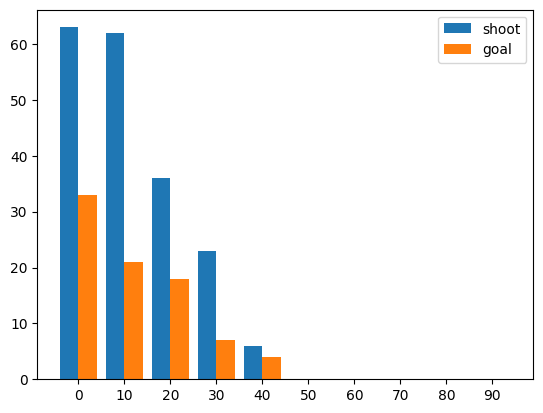

In [244]:
import matplotlib.pyplot as plt
import numpy as np  

x_axis = np.arange(0, 100, 10) 
width = 4

plt.bar(x_axis - width//2, shoot_count, width = width, label = 'shoot') 
plt.bar(x_axis + width//2, goal_count, width = width, label = 'goal')
plt.xticks(x_axis, x_axis)
plt.legend(loc = 'upper right')
plt.show()

# Assist Heatmap and Arrow for goal type

In [239]:
def shoot_assist_heatmap(_df, _ax, _ptich_type, str1) : 
    # Assist Heatmap
    bin_statistic_assist = _ptich_type.bin_statistic_positional(_df['shoot_assist_X'], _df['shoot_assist_Y'], 
                                                                statistic = 'count',
                                                                positional = 'full', normalize = True)

    _ptich_type.heatmap_positional(bin_statistic_assist, ax = _ax[0], cmap = 'coolwarm', edgecolors = '#22312b')
    _ptich_type.scatter(_df['shoot_assist_X'], _df['shoot_assist_Y'], c = 'green', s = 2, ax = _ax[0])

    labels = _ptich_type.label_heatmap(bin_statistic_assist, color = 'black', fontsize = 10,
                                       ax = _ax[0], ha = 'center', va = 'center',
                                       str_format='{:.0%}')

    _ax[0].set_title(f"Heatmap for {str1}_goal {len(_df)}", fontsize = 10)

    # Assist Arrow
    _ptich_type.scatter(_df['shoot_assist_X'], _df['shoot_assist_Y'], color = 'green', ax = _ax[1])
    _ptich_type.scatter(_df['shoot_position_x'], _df['shoot_position_y'], color = 'blue', ax = _ax[1])
    
    _ptich_type.arrows(_df['shoot_assist_X'], _df['shoot_assist_Y'],
                       _df['shoot_position_x'], _df['shoot_position_y'], width = 1,
                       headwidth = 5, headlength = 5, color = '#ad993c', ax = _ax[1])

    _ax[1].set_title(f"Arrow for {str1}_goal {len(_df)}", fontsize = 10)


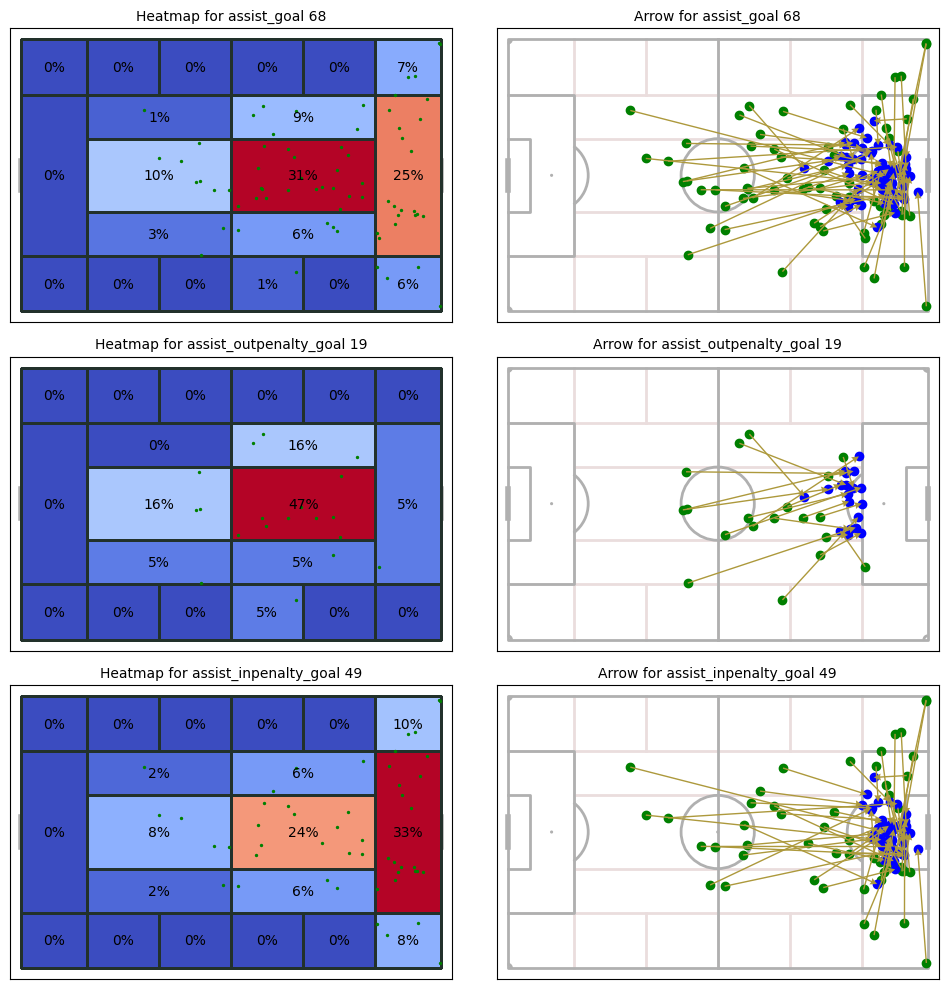

In [240]:
fig, ax = pitch_full.draw(figsize=(10, 10), ncols = 2, nrows = 3)

shoot_assist_heatmap(goal_assist, ax[0], pitch_full, 'assist')
shoot_assist_heatmap(goal_assist_outpenalty, ax[1], pitch_full, 'assist_outpenalty')
shoot_assist_heatmap(goal_assist_inpenalty, ax[2], pitch_full, 'assist_inpenalty')

plt.show()
